<img alt="QuantRocket logo" src="https://www.quantrocket.com/assets/img/notebook-header-logo.png">

<a href="https://www.quantrocket.com/disclaimer/">Disclaimer</a>

# Researching the Momentum Factor

Momentum investing says that excess returns can be generated by buying recent winners and selling recent losers. In this notebook we will research the momentum factor on our universe of demo stocks. This will help us determine whether we have a profitable idea before turning to a full backtest.  

First, load your historical data into pandas.

In [1]:
from quantrocket import get_prices
prices = get_prices("demo-stocks-1d", fields=["Close"])
prices.head()

Sid               FIBBG000B9XRY4  FIBBG000BFWKC0  FIBBG000BKZB36  \
Field Date                                                         
Close 2007-01-03         10.6770         47.3521         34.5351   
      2007-01-04         10.9140         46.5366         34.1146   
      2007-01-05         10.8363         46.9306         33.4587   
      2007-01-08         10.8898         46.3167         33.2065   
      2007-01-09         11.7944         45.9960         33.0635   

Sid               FIBBG000BMHYD1  FIBBG000BPH459  FIBBG000CK38G3  \
Field Date                                                         
Close 2007-01-03         54.7978         25.8703           10.93   
      2007-01-04         55.4827         25.8269           10.97   
      2007-01-05         54.9793         25.6797           10.72   
      2007-01-08         54.8885         25.9309           10.71   
      2007-01-09         54.6822         25.9569           10.97   

Sid               FIBBG000GZQ728  FIBBG00B3T3HD3  
Field Date                                        
Close 2007-01-03         58.4041             NaN  
      2007-01-04         57.3087             NaN  
      2007-01-05         57.7185             NaN  
      2007-01-08         57.2535             NaN  
      2007-01-09         56.8122             NaN

Next, we use closing prices to calculate our momentum factor. We calculate momentum using a twelve-month window but excluding the most recent month, as commonly recommended by academic papers. 

In [2]:
closes = prices.loc["Close"]

MOMENTUM_WINDOW = 252 # 12 months = 252 trading days
RANKING_PERIOD_GAP = 22 # 1 month = 22 trading days
earlier_closes = closes.shift(MOMENTUM_WINDOW)
later_closes = closes.shift(RANKING_PERIOD_GAP)
momentum_returns = (later_closes - earlier_closes) / earlier_closes

Now that we have the twelve-month returns, we calculate the next day returns:

In [3]:
next_day_returns = closes.pct_change().shift(-1)

To see if the twelve-month returns predict next-day returns, we will split the twelve-month returns into bins and look at the mean next-day return of each bin. To do this, we first need to stack our wide-form DataFrames into Series. 

In [4]:
momentum_returns = momentum_returns.stack(dropna=False)
next_day_returns = next_day_returns.stack(dropna=False)

Use pandas' `qcut` function to create the bins: 

In [5]:
import pandas as pd

# For a very small demo universe, you might only want 2 quantiles 
num_bins = 2
bins = pd.qcut(momentum_returns, num_bins)

Now group the next day returns by momentum bin and plot the mean return:

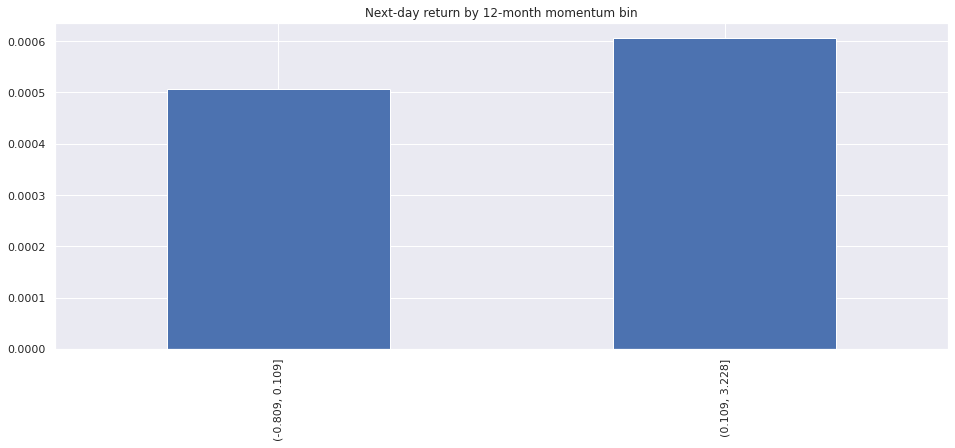

In [6]:
next_day_returns.groupby(bins).mean().plot(kind="bar", title="Next-day return by 12-month momentum bin")

For a predictive factor, the higher quantiles should perform better than the lower quantiles.

***

## *Next Up*

Part 4: [Moonshot Strategy Code](Part4-Moonshot-Strategy-Code.ipynb)